<a href="https://colab.research.google.com/github/sakusakupanda03/BachelorThesis/blob/main/notebooks/04_interpret_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サマリー

テーマ：BTC市場とETH市場の効率性について

観測される事実：過去の歴史や論文数の違いなどから、ETH市場はBTC市場よりも研究者・実務家によって価格予測の研究がされ尽くされてはいないはずである。

問い：ETH市場はBTC市場より効率性が低いのか？すなわち、ETHの方がBTCよりも偏自己相関が高く、予測精度も高いのか？

仮説：
- 帰無仮説1: ETHの偏自己相関 - BTCの偏自己相関 = 0
- 対立仮説1: ETHの偏自己相関 - BTCの偏自己相関 < 0
- 帰無仮説2: ETHの予測精度 - BTCの予測精度 = 0
- 対立仮説2: ETHの予測精度 - BTCの予測精度 < 0

答え：ETH市場がBTC市場より市場効率性が低い。ETHの偏自己相関 - BTCの偏自己相関 < 0であると統計的有意に言える。予測精度に関しても、ETHの予測精度 - BTCの予測精度 < 0であると統計的有意に言える。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

path = "../data"
path = "/content/drive/MyDrive/sotsuron/data"

In [ ]:
m4_lr = pd.read_pickle(path + "/04_reporting/num_train_months_4_lr.pickle").T
m4_lr.name='m4_lr'
m4_lr.index.name="year_month"
m9_lr = pd.read_pickle(path + "/04_reporting/num_train_months_9_lr.pickle").T
m9_lr.name = 'm9_lr'
m9_lr.index.name='year_month'
m4_rf = pd.read_pickle(path + "/04_reporting/num_train_months_4_rf.pickle").T
m4_rf.name = 'm4_rf'
m4_rf.index.name='year_month'
m9_rf = pd.read_pickle(path + "/04_reporting/num_train_months_9_rf.pickle").T
m9_rf.name = 'm9_rf'
m9_rf.index.name="year_month"
m4_lr.columns

Index(['BTC PACF Scores', 'ETH PACF Scores', 'BTC Train Scores',
       'ETH Train Scores', 'BTC Test Scores', 'ETH Test Scores',
       'BTC Features Importance', 'ETH Features Importance'],
      dtype='object')

- 4か月で試した結果をレポーティングする
- lrとrf両方レポーティングする

In [ ]:
for df in [m4_lr, m9_lr]:
    print(df.name.strip("_lr"))
    print(np.mean(np.sqrt(df[["BTC PACF Scores", "ETH PACF Scores"]]**2)))

    df["Diff PACF Scores"] = np.sqrt(df["ETH PACF Scores"]**2) - np.sqrt(df["BTC PACF Scores"]**2)
    res = wilcoxon(df["Diff PACF Scores"], alternative='less')
    print(res.statistic, res.pvalue)

m4
BTC PACF Scores    0.165960
ETH PACF Scores    0.145798
dtype: float64
283.0 0.5178146565920552
m9
BTC PACF Scores    0.158257
ETH PACF Scores    0.142867
dtype: float64
216.0 0.6163958433720447


In [ ]:
print(df["BTC PACF Scores"].describe())
print(df["ETH PACF Scores"].describe())

count    28.000000
mean     -0.112303
std       0.188463
min      -0.683053
25%      -0.173799
50%      -0.104064
75%      -0.002471
max       0.206897
Name: BTC PACF Scores, dtype: float64
count    28.000000
mean     -0.084668
std       0.166744
min      -0.392690
25%      -0.196876
50%      -0.031486
75%       0.051436
max       0.185185
Name: ETH PACF Scores, dtype: float64


In [ ]:
for df in [m4_lr, m4_rf, m9_lr, m9_rf]:
    print(df.name)
    print(df[["BTC Test Scores", "ETH Test Scores"]].describe())

m4_lr
       BTC Test Scores  ETH Test Scores
count        33.000000        33.000000
mean          0.623921         0.530031
std           0.128052         0.133227
min           0.333333         0.222222
25%           0.540541         0.451613
50%           0.625000         0.516129
75%           0.727273         0.631579
max           0.833333         0.772727
m4_rf
        BTC Test Scores  ETH Test Scores
count         33.000000        33.000000
unique        30.000000        30.000000
top            0.666667         0.444444
freq           2.000000         3.000000
m9_lr
       BTC Test Scores  ETH Test Scores
count        28.000000        28.000000
mean          0.651412         0.602091
std           0.077539         0.094797
min           0.470588         0.370370
25%           0.606061         0.542424
50%           0.657658         0.620192
75%           0.689655         0.666667
max           0.823529         0.742857
m9_rf
        BTC Test Scores  ETH Test Scores
count     

In [ ]:
for df in [m4_lr, m4_rf, m9_lr, m9_rf]:
    print(df.name)
    print(df[["BTC Test Scores", "ETH Test Scores"]].mean())

    df["Diff Test Scores"] = df["ETH Test Scores"] - df["BTC Test Scores"]
    res = wilcoxon(df["Diff Test Scores"], alternative='less')
    print(res.statistic, res.pvalue)

m4_lr
BTC Test Scores    0.623921
ETH Test Scores    0.530031
dtype: float64
94.0 0.0004305791855688177
m4_rf
BTC Test Scores    0.579237
ETH Test Scores    0.522391
dtype: float64
167.0 0.021280195034793243
m9_lr
BTC Test Scores    0.651412
ETH Test Scores    0.602091
dtype: float64
121.0 0.030932873192233534
m9_rf
BTC Test Scores    0.611654
ETH Test Scores    0.571680
dtype: float64
120.0 0.048686499627542845


In [ ]:
for df in [m4_lr, m4_rf, m9_lr, m9_rf]:
    print(df.name)
    print(df[["BTC Test Scores", "ETH Test Scores"]].mean())

    df["Diff Test Scores"] = df["BTC Test Scores"] - df["ETH Test Scores"]
    res = wilcoxon(df["Diff Test Scores"], alternative='greater')
    print(res.statistic, res.pvalue)

m4_lr
BTC Test Scores    0.623921
ETH Test Scores    0.530031
dtype: float64
467.0 0.0004305791855688177
m4_rf
BTC Test Scores    0.579237
ETH Test Scores    0.522391
dtype: float64
394.0 0.021280195034793243
m9_lr
BTC Test Scores    0.651412
ETH Test Scores    0.602091
dtype: float64
285.0 0.030932873192233534
m9_rf
BTC Test Scores    0.611654
ETH Test Scores    0.571680
dtype: float64
258.0 0.048686499627542845


In [ ]:
df["Diff Test Scores"] = df["BTC PACF Scores"] - df["ETH PACF Scores"]
res = wilcoxon(df["Diff Test Scores"], alternative='greater')
print(res.statistic, res.pvalue)

176.0 0.7306659846467884


In [ ]:
m4_rf["BTC Test Scores"].describe()

count     33.000000
unique    30.000000
top        0.666667
freq       2.000000
Name: BTC Test Scores, dtype: float64

In [ ]:
m4_rf.loc[m4_lr["ETH Test Scores"] >0.5 ,"ETH Test Scores"].count()

18

# レポーティング

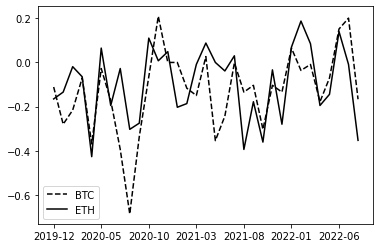

In [ ]:
m4_lr["BTC PACF Scores"].plot(style=["k--"],legend=True, label="BTC")
m4_lr["ETH PACF Scores"].plot(style=["k"],legend=True, label="ETH")
plt.xlabel("")
plt.legend(loc="lower left");

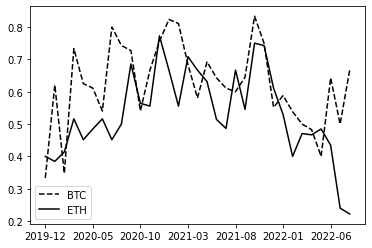

In [ ]:
m4_lr["BTC Test Scores"].plot(style=["k--"],legend=True, label="BTC")
m4_lr["ETH Test Scores"].plot(style=["k"],legend=True, label="ETH")
plt.xlabel("")
plt.legend(loc="lower left");

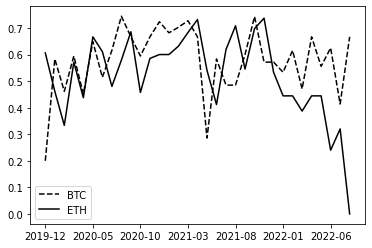

In [ ]:
m4_rf["BTC Test Scores"].plot(style=["k--"],legend=True, label="BTC")
m4_rf["ETH Test Scores"].plot(style=["k"],legend=True, label="ETH")
plt.xlabel("")
plt.legend(loc="lower left");